In [22]:
import pandas as pd
unkai_df = pd.read_csv("./雲海2015.csv", header=1)
unkai_df.head()

,日付,出現,確率,閾値40,閾値50,閾値60
0,2015/5/16,0.0,20,適中,適中,適中
1,2015/5/17,0.0,30,適中,適中,適中
2,2015/5/18,0.0,40,空振り,適中,適中
3,2015/5/19,1.0,30,見逃し,見逃し,見逃し
4,2015/5/20,0.0,20,適中,適中,適中


In [23]:
target_df = unkai_df.loc[unkai_df["閾値40"] == "適中"]
target_df.head()

,日付,出現,確率,閾値40,閾値50,閾値60
0,2015/5/16,0.0,20,適中,適中,適中
1,2015/5/17,0.0,30,適中,適中,適中
4,2015/5/20,0.0,20,適中,適中,適中
6,2015/5/22,0.0,30,適中,適中,適中
7,2015/5/23,0.0,30,適中,適中,適中


In [24]:
target_dates = target_df["日付"].to_numpy()
target_dates

array(['2015/5/16', '2015/5/17', '2015/5/20', '2015/5/22', '2015/5/23',
       '2015/5/24', '2015/5/25', '2015/5/26', '2015/5/28', '2015/5/29',
       '2015/5/30', '2015/6/1', '2015/6/2', '2015/6/3', '2015/6/4',
       '2015/6/5', '2015/6/6', '2015/6/7', '2015/6/10', '2015/6/11',
       '2015/6/12', '2015/6/14', '2015/6/15', '2015/6/16', '2015/6/17',
       '2015/6/18', '2015/6/19', '2015/6/22', '2015/6/23', '2015/6/24',
       '2015/6/25', '2015/6/27', '2015/6/28', '2015/6/30', '2015/7/1',
       '2015/7/2', '2015/7/3', '2015/7/5', '2015/7/6', '2015/7/7',
       '2015/7/11', '2015/7/13', '2015/7/14', '2015/7/15', '2015/7/16',
       '2015/7/18', '2015/7/19', '2015/7/20', '2015/7/22', '2015/7/23',
       '2015/7/26', '2015/7/27', '2015/7/30', '2015/7/31', '2015/8/1',
       '2015/8/2', '2015/8/3', '2015/8/5', '2015/8/6', '2015/8/7',
       '2015/8/8', '2015/8/13', '2015/8/18', '2015/8/19', '2015/8/20',
       '2015/8/21', '2015/8/22', '2015/8/23', '2015/8/26', '2015/8/28',
       '2015

In [25]:
def inquire_grib_data(path):
    import pygrib                  # gribファイルの中身を見たい場合はinquire_grib_data(path)を実行                
    grbs = pygrib.open(path)
    for grb in grbs:
        print(grb)
    return
def read_grib_data(path,name=None,level=None):
    import numpy as np
    import pygrib                   # pygribは!pip3 install pygrib --userでインストール
    grbs = pygrib.open(path)

    if name != None:                # anl_surf125に対しては変数名を与える
        alines = grbs.select(name=name)
    elif level != None:             # anl_p125に対しては気圧面を与えるとその水平面データ
        alines = grbs.select(level=level)
    else:                           #                  気圧面を与えないと全３次元データ
        alines = grbs.select()

    lat, lon = alines[0].latlons()  # lonは経度、latは緯度データ: (ny,nx)の２次元格子です
    ny, nx = lat.shape
    nline = len(alines)
    gdata = np.empty( (nline,ny,nx), dtype = "f4" )
    levels = np.empty( (nline), dtype = "f4" )
    for iline, aline in enumerate(alines):
        gdata[iline,:,:] = aline.values[::-1,:]
        levels[iline] = aline["level"]

    return lon, lat[::-1], level, gdata 

In [26]:
import datetime as dt
import calendar as cal
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

dts=[]
for m in range(12):
    month=m+1
    nmonth=cal.monthrange(2015,month)[1]
    dts.extend([dt.datetime(2015,month,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)])  #一年分の平均


slpm=np.zeros((len(dts),145,288))
#slpm[target_idxes, :, :] /= 100

for i,dt in enumerate(dts):
    fdir = "/mnt/hwmet-hdd01/Database/JRA55/anl_p125/"
    fname = "/anl_surf125."
    path=dt.strftime(fdir+"%Y%m"+fname+"%Y%m%d%H")
    lon,lat,_,SLP0=read_grib_data(path,name="Mean sea level pressure")
    slpm[i,:,:]=SLP0

    
target_idxes = []
for idx, d in enumerate(dts):
    string_dt = f"{d.year}/{d.month}/{d.day}"
    if string_dt in target_dates:
#         print(idx, string_dt)
        target_idxes.append(idx)

slpm[target_idxes, :, :] /= 100
print(target_idxes)

[540, 541, 542, 543, 544, 545, 546, 547, 556, 557, 558, 559, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 708, 709, 710, 711, 712, 713, 714, 715, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 764, 765, 766, 767, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 808, 809, 810, 811, 812, 813, 814, 815,

In [27]:
mean = np.mean(slpm[target_idxes, :, :], axis=0)
mean

array([[1026.96787109, 1026.96787109, 1026.96787109, ..., 1026.96787109,
        1026.96787109, 1026.96787109],
       [1026.03217398, 1026.03217398, 1026.26251395, ..., 1025.6454123 ,
        1025.80071793, 1026.03217398],
       [1023.94846862, 1023.98821793, 1024.78080035, ..., 1023.02264445,
        1023.1036884 , 1023.90528524],
       ...,
       [1014.57655928, 1014.57664513, 1014.55844458, ..., 1014.59579005,
        1014.59424472, 1014.5775895 ],
       [1014.62480791, 1014.62480791, 1014.62068703, ..., 1014.6400895 ,
        1014.63322137, 1014.62480791],
       [1014.62772686, 1014.62772686, 1014.62772686, ..., 1014.62772686,
        1014.62772686, 1014.62772686]])

In [28]:
import datetime as dt
import calendar as cal
import numpy as np
nmonth=cal.monthrange(2015,8)[1]
dts=[dt.datetime(2015,8,1,0)+dt.timedelta(hours=6*i) for i in range(nmonth*4)]

parameter_counts = 4
slpm=np.zeros((len(dts),145,288, parameter_counts)) #データの置き場所をつくる
SLP0 /= 100

for i,dt in enumerate(dts):
    fdir = "/mnt/hwmet-hdd01/Database/JRA55/anl_p125/"
    fname = "/anl_surf125."
    path=dt.strftime(fdir+"%Y%m"+fname+"%Y%m%d%H")
    lon,lat,_, SLP0=read_grib_data(path,name="Mean sea level pressure")
    lon,lat,_, Temperature = read_grib_data(path, name="2 metre temperature")
    lon,lat,_, u_wind = read_grib_data(path, name="10 metre U wind component")
    lon,lat,_, v_wind = read_grib_data(path,name="10 metre V wind component")
    
    slpm[i, :, :, 0]=SLP0
    slpm[i, :, :, 1] = Temperature
    slpm[i, :, :, 2] = u_wind
    slpm[i, :, :, 3] = v_wind
    
slp_mean = np.mean(slpm[:, :, :, 0], axis=0)
temperature_mean = np.mean(slpm[:, :, :, 1], axis=0)
u_wind_mean = np.mean(slpm[:, :, :, 2], axis=0)
v_wind_mean = np.mean(slpm[:, :, :, 3], axis=0)    

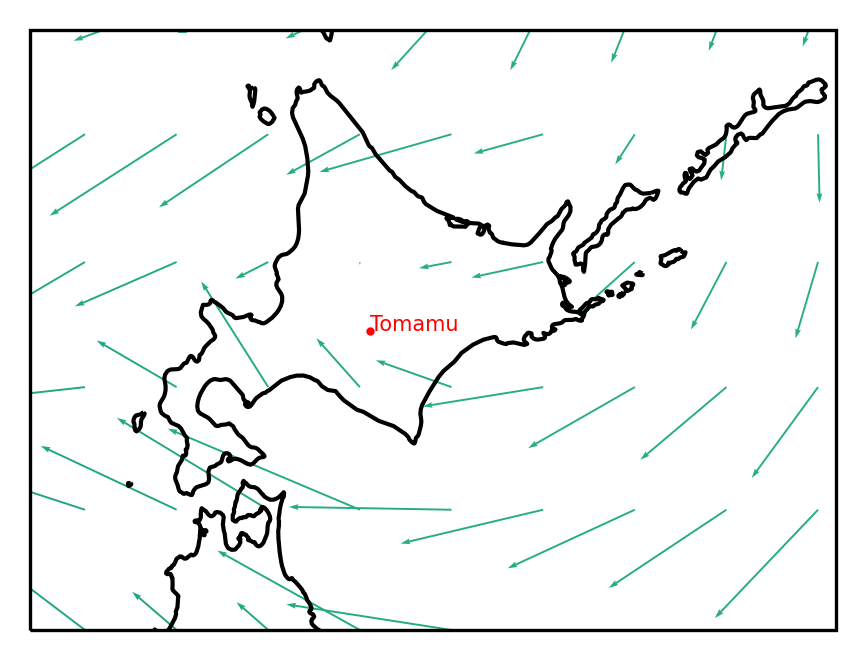

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure( figsize = (5,2.5), dpi = 300 )
proj = ccrs.Mercator(central_longitude=140)
proj_cart = ccrs.PlateCarree()
ax = plt.axes((0.1,0.1,0.8,0.8), projection=proj)
ax.set_extent([138,149,40,46],crs=proj_cart)
ax.coastlines()

lat_tomamu = 43.0631836
lon_tomamu = 142.6316828
ax.plot(lon_tomamu, lat_tomamu, 'o', transform=ccrs.PlateCarree(),markersize=1, color='r')
plt.text(lon_tomamu, lat_tomamu, 'Tomamu', size=5, color='red',horizontalalignment='left', transform=ccrs.PlateCarree())

ax.quiver(lon, lat, u_wind_mean, v_wind_mean, scale=5, scale_units="inches", transform=ccrs.PlateCarree())
fig.savefig("適中の日の平均風向")